In [21]:
import numpy as np 
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
df="/kaggle/input/lego-minifigures-classification"

In [6]:
datagen=ImageDataGenerator(
rescale=1.0/255,
rotation_range=40,
width_shift_range=0.2, 
height_shift_range=0.2,
horizontal_flip=True,
fill_mode="nearest",
zoom_range=0.2,
shear_range=0.2
)

In [8]:
train_data=datagen.flow_from_directory(
df,
target_size=(256,256),
batch_size=32,
class_mode=None,
)

Found 494 images belonging to 5 classes.


# # Deep learning

In [33]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,TimeDistributed,BatchNormalization,Dropout,Input,ReLU,Conv2DTranspose,Reshape,MultiHeadAttention
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [48]:
inputs=Input(shape=(256,256,3))
E=Conv2D(32,(3,3),padding="same",activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(64,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(128,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(256,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)

E=Conv2D(556,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)

flatten=E.shape[1]*E.shape[2]
R=Reshape((flatten,556))(E)
M=MultiHeadAttention(num_heads=5,key_dim=556)(R,R)
R=Reshape((E.shape[1],E.shape[2],556))(M)


E=Conv2DTranspose(256,(3,3),strides=(2,2),padding="same",activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(R)
E=ReLU()(E)

E=BatchNormalization()(E)
E=Conv2DTranspose(128,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=Conv2DTranspose(64,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=Conv2DTranspose(32,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
outputs=Conv2D(3,(3,3),activation="sigmoid",padding="same")(E)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss='mse',metrics=["accuracy"])
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_73[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_53    │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_53… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_76 (ReLU)     │ (None, 128, 128,  │          0 │ conv2d_74[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ re_lu_76[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_54    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_54… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_77 (ReLU)     │ (None, 64, 64,    │          0 │ conv2d_75[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ re_lu_77[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_55    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_55… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_78 (ReLU)     │ (None, 32, 32,    │          0 │ conv2d_76[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ re_lu_78[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_56    │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 16, 16,    │  1,281,580 │ max_pooling2d_56

 Total params: 9,537,119 (36.38 MB)

 Trainable params: 9,534,087 (36.37 MB)

 Non-trainable params: 3,032 (11.84 KB)

In [49]:
for i in train_data:
    model.fit(i,i,epochs=10)
    break

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.3361 - loss: 40.8827
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3463 - loss: 39.0728
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3540 - loss: 37.3280
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3616 - loss: 35.6533
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.3746 - loss: 34.0432
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3853 - loss: 32.4966
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3904 - loss: 31.0119
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3901 - loss: 29.5874
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3861 - loss: 28.2217
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3859 - loss: 26.9151


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


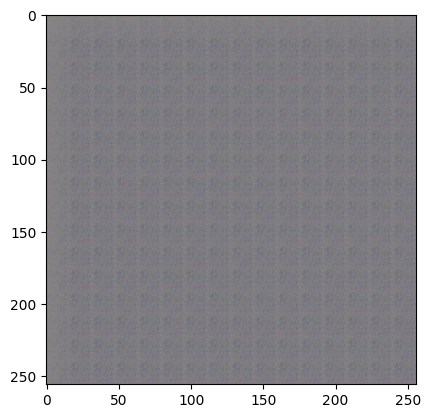

In [50]:
# for i in train_data[0]:
prediction=model.predict(train_data[0])
plt.imshow(prediction[10])
plt.show()
#     break
    